In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('bmh')

import networkx as nx

In [2]:
path = "/Users/dj/Documents/GitHub/Causal_Data_Science/Project/Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']

In [3]:
# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

In [4]:
print(train.sum().sum())
print(test.sum().sum())

11923
60290


In [5]:
print(train.shape)
print(test.shape)
print(target.shape)

(2000, 11)
(10000, 11)
(2000, 1)


In [6]:
target.head()

,0
0,-1
1,1
2,1
3,-1
4,1


In [7]:
avgs = train[names].mean()

In [8]:
avgs

Smoking               0.7525
Yellow_Fingers        0.7820
Anxiety               0.6305
Peer_Pressure         0.3415
Genetics              0.1395
Attention_Disorder    0.3225
Born_an_Even_Day      0.4895
Car_Accident          0.7230
Fatigue               0.7370
Allergy               0.3430
Coughing              0.7005
dtype: float64

In [9]:
train["Target"] = np.array(target)

In [10]:
train.head(20)

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Target
0,0,0,1,0,0,1,0,1,0,1,0,-1
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,-1
4,1,1,1,0,0,1,1,1,1,0,0,1
5,1,1,0,1,0,0,1,1,1,1,1,1
6,1,1,1,1,0,0,0,1,1,0,1,1
7,1,1,1,0,0,0,1,1,1,0,1,1
8,0,0,0,0,0,0,0,1,0,0,0,-1
9,1,1,1,1,0,0,1,1,1,1,1,1


# Plotting Variables

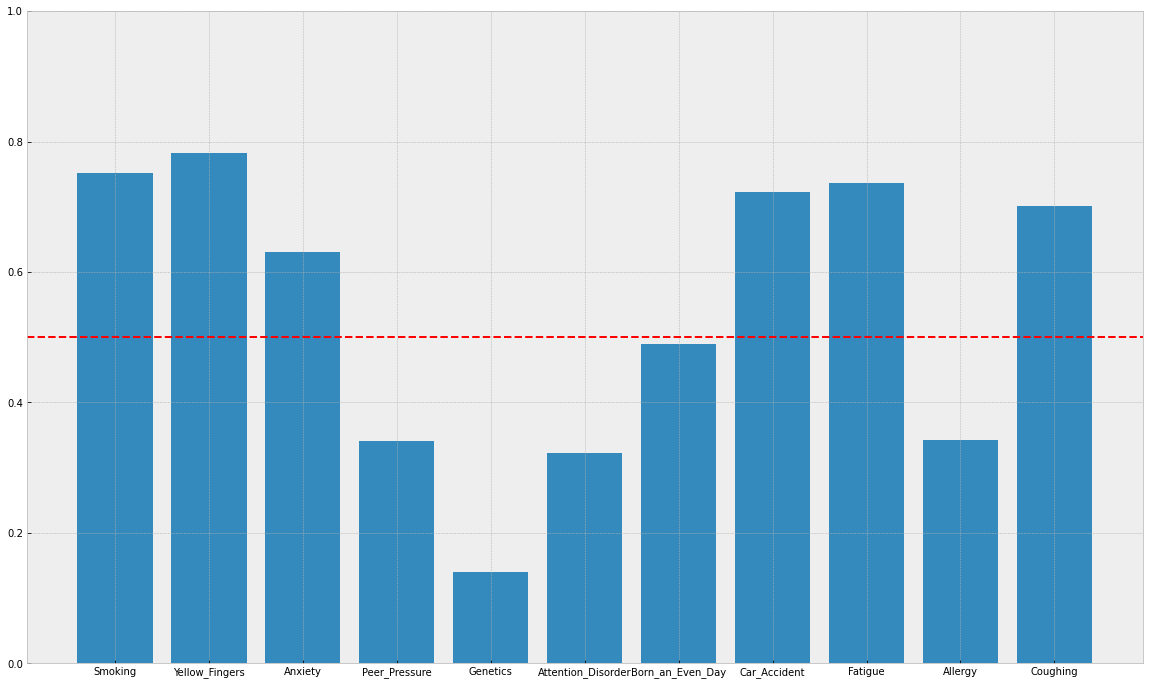

In [11]:
plt.figure(figsize=(20,12))
plt.bar(names,avgs, )
plt.ylim(0, 1)
plt.axhline(0.5, c='r', linestyle='--')

# Graph 

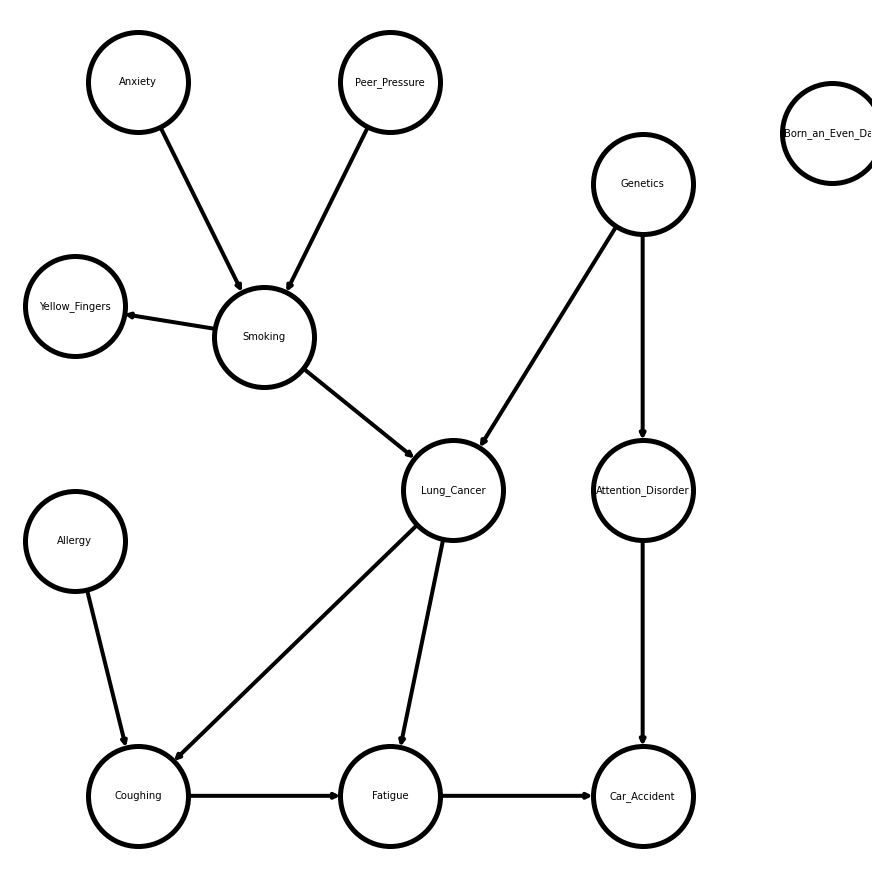

In [74]:
# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(12,12))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "backdoor_criterion_graph.gml")

plt.show()

# Backdoor criterion 

In [75]:
# this function finds the descendants of node 'X' in graph G
# note that in this function they do not include 'X' as a descendant of 'X' - this is not the definition we use, so we add 'X'
nx.descendants(G,'Coughing') | {'Coughing'}

{'Car_Accident', 'Coughing', 'Fatigue'}

In [76]:
# importing the backdoor class from DoWhy
from dowhy.causal_identifiers import backdoor

# Backfor paths: A->X and Z->x could be two, X bust be at beginning and against stream

# creating a copy of our graph G that is undirected
H = G.to_undirected() # undirected path

In [79]:
# the all_simple_paths function finds all possible undirected paths between 'X' and 'Y' in graph H
# the [x for x ...] is simply to get the values from the generator
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Coughing', 'Car_Accident')] # take undirected graph and say we want to go from y -> y
all_possible_paths

[['Coughing', 'Fatigue', 'Car_Accident'],
 ['Coughing',
  'Fatigue',
  'Lung_Cancer',
  'Genetics',
  'Attention_Disorder',
  'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [80]:
# we can create a Backdoor object with G, 'X', and 'Y'
# note that we are back to using the directed graph, G, as we only needed the undirected to find the paths
graph_nodes = backdoor.Backdoor(G, 'Coughing', 'Car_Accident')

In [81]:
# we apply the is_backdoor function to each path to check if a path is a backdoor path
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]

# finally, we filter out all non-backdoor paths from the list of all paths
backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
backdoor_paths

[['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [82]:
# we create a pandas dataframe to track the path and its colliders and non-colliders
import pandas as pd
import numpy as np
adjustment_variables = pd.DataFrame(columns=['path', 'colliders_desc', 'non_colliders'])

Lets take a look at the following path:

'Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'

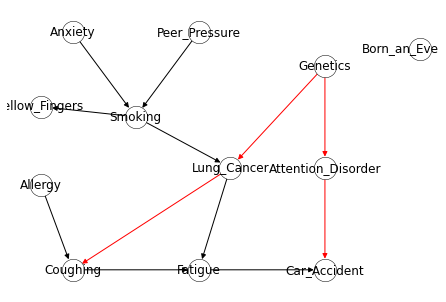

In [104]:
colors = ['black', 'black', 'black', 'black', 'r', 'r', 'r', 'black', 'black', 'black', 'r', 'black']
nx.draw(G, pos= pos, with_labels=True, node_size=500, node_color='w', edgecolors = 'black', edge_color =colors)

In [105]:
# this is the path we are testing
path = ['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident']

In [106]:
# we create empty (for now) lists for our colliders and non-colliders
# we also create a variable for the length of the path
colliders_desc = np.array([])
non_colliders = []
path_len = len(path)

In [107]:
# we loop through adjacent variables on the path, ignoring the source and target variables as potential colliders
for node0, node1, node2 in zip(path[0:path_len-2], path[1:path_len-1], path[2:]):
    # if there is an arrow pointing into node1 from both sides on the path, it is a collider
    if G.has_edge(node0, node1) and G.has_edge(node2, node1):
        colliders_desc = np.append(colliders_desc, list(nx.descendants(G,node1)) + [node1]) # so we add it (and all its descendants) to the list
# we flatten the list of list
colliders_desc = colliders_desc.flatten()
print(colliders_desc)

# We see that we do not have any colliders.

[]


In [108]:
# any node on the path (excluding the source and target) that is not a collider is a non-collider
non_colliders = [x for x in path[1:-1] if x not in colliders_desc]
print(non_colliders)

# Here are the non colliders

['Lung_Cancer', 'Genetics', 'Attention_Disorder']


/var/folders/9r/pl8035cn4cjb59msrdwcrvhr0000gn/T/ipykernel_2317/1109781193.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  non_colliders = [x for x in path[1:-1] if x not in colliders_desc]


In [109]:
# finally, we add the information to our dataframe, with the path, colliders, and non-colliders
adjustment_variables = adjustment_variables.append({'path':path, 'colliders_desc': colliders_desc, 
                                                    'non_colliders': non_colliders}, ignore_index=True)

In [110]:
adjustment_variables

# For blocking: not condition on colliders or condition on non-colliders

,path,colliders_desc,non_colliders
0,"[Coughing, Lung_Cancer, Genetics, Attention_Di...",[],"[Lung_Cancer, Genetics, Attention_Disorder]"


### Now the same for another graph

In [111]:
# this is the path we are testing
path = ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']

# we create empty (for now) lists for our colliders and non-colliders
# we also create a variable for the length of the path
colliders_desc = np.array([])
non_colliders = []
path_len = len(path)

# we loop through adjacent variables on the path, ignoring the source and target variables as potential colliders
for node0, node1, node2 in zip(path[0:path_len-2], path[1:path_len-1], path[2:]):
    # if there is an arrow pointing into node1 from both sides on the path, it is a collider
    if G.has_edge(node0, node1) and G.has_edge(node2, node1):
        colliders_desc = np.append(colliders_desc, list(nx.descendants(G,node1)) + [node1]) # so we add it (and all its descendants) to the list
# we flatten the list of list
colliders_desc = colliders_desc.flatten()
        
# any node on the path (excluding the source and target) that is not a collider is a non-collider
non_colliders = [x for x in path[1:-1] if x not in colliders_desc]

# finally, we add the information to our dataframe, with the path, colliders, and non-colliders
adjustment_variables = adjustment_variables.append({'path':path, 'colliders_desc': colliders_desc, 
                                                    'non_colliders': non_colliders}, ignore_index=True)

adjustment_variables

/var/folders/9r/pl8035cn4cjb59msrdwcrvhr0000gn/T/ipykernel_2317/974501221.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  non_colliders = [x for x in path[1:-1] if x not in colliders_desc]


,path,colliders_desc,non_colliders
0,"[Coughing, Lung_Cancer, Genetics, Attention_Di...",[],"[Lung_Cancer, Genetics, Attention_Disorder]"
1,"[Coughing, Lung_Cancer, Fatigue, Car_Accident]",[],"[Lung_Cancer, Fatigue]"


# Same, but now with DoWhy

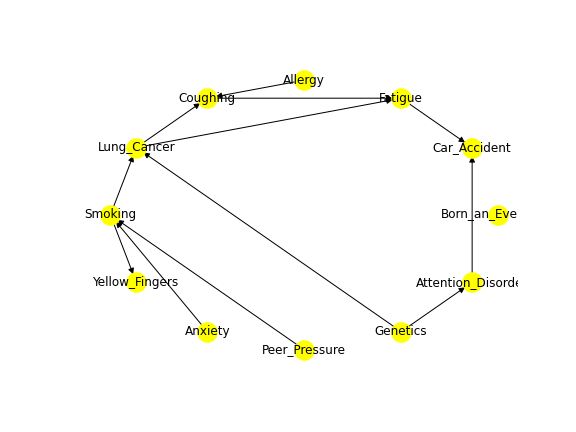

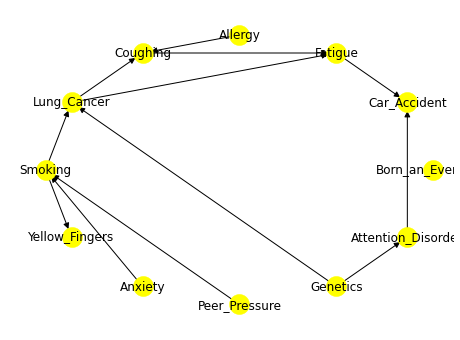

In [114]:
import dowhy
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

display(Image(filename="causal_model.png", width = 200, height = 100))

In [115]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [116]:
identifier = model.identifier
identifier.identify_backdoor(identifier.treatment_name, identifier.outcome_name) # Here we see all the calid backdoor_sets

[{'backdoor_set': ('Yellow_Fingers',
   'Anxiety',
   'Genetics',
   'Lung_Cancer',
   'Smoking',
   'Peer_Pressure',
   'Allergy',
   'Attention_Disorder')},
 {'backdoor_set': ('Lung_Cancer',)}]

# Frontdoor criterion

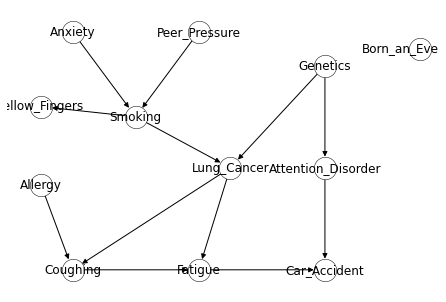

In [22]:
# we import networkx and create a directed graph
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35),}


nx.draw(G, pos= pos, with_labels=True, node_size=500, node_color='w', edgecolors ='black')
nx.write_gml(G, "frontdoor_criterion_graph.gml")

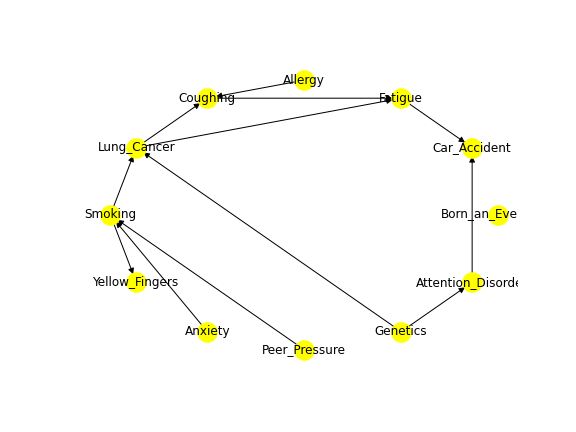

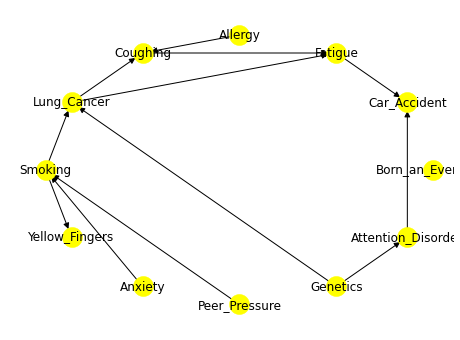

In [31]:
import dowhy
import pandas as pd
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('frontdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

display(Image(filename="causal_model.png", width = 200, height = 100))

In [34]:
# we extract the CausalGraph object from our CausalModel object
our_causal_graph = model._graph

In [36]:
model._graph

In [38]:
# function that finds backdoor paths from the first node to the second
x_w_backdoor_paths = our_causal_graph.get_backdoor_paths('Coughing', 'Car_Accident')
x_w_backdoor_paths # These paths must all be blocked.

NodeNotFound: source node C not in graph

In [39]:
# list for keeping track of which paths are blocked
path_is_blocked = []

# looping through the backdoor paths from X to W
for path in x_w_backdoor_paths:
    # the is_blocked function checks with a path is blocked when conditioning on the set conditioned_nodes
    # in this case, we are not conditioning on any nodes, so give it the empty set
    path_is_blocked.append(our_causal_graph.is_blocked(path, conditioned_nodes = [])) # not condition on anything in this case

path_is_blocked

NameError: name 'x_w_backdoor_paths' is not defined